In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import scipy as sci
from requests import get
import folium
from geopy.geocoders import ArcGIS

In [2]:
url = 'http://feed.unmung.com/feed?feed=http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5+_month.atom'

In [3]:
response=get(url)
soup=BeautifulSoup(response.text,'html.parser')

In [4]:
soup

<html>
<head><title>USGS Magnitude 4.5+ Earthquakes, Past Month</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="styles/hfeed.css" media="all" rel="stylesheet" type="text/css"/>
<script src="static/fragmention.js"></script>
</head>
<body class="h-feed">
<h1 class="p-name"><a class="u-url" href="">USGS Magnitude 4.5+ Earthquakes, Past Month</a></h1>
<h2 class="e-summary"></h2>
<p class="p-author h-card">
<a href="https://earthquake.usgs.gov/">U.S. Geological Survey</a>
</p>
<details class="h-entry" open="">
<summary class="p-name"><a class="u-url" href="https://earthquake.usgs.gov/earthquakes/eventpage/us70008q3h">M 5.0 - 79km WNW of Sinabang, Indonesia</a></summary>
<div class="e-content">
<span class="e-summary">
<p class="quicksummary"><a class="tsunamilogo" href="http://www.tsunami.gov/" title="Tsunami Warning Center"> <img alt="Tsunami Warning Center" src="https://earthquake.usgs.gov/earthquakes/feed/v1.0/images/tsu

In [5]:
Location=soup.find_all('a',class_="u-url")
Data=soup.find_all('span',class_="e-summary")
#g1=Data[0].find_all('dd')
#g2=Data[1].find_all('dd')
#L=Location[1].get_text()

Location.pop(0)
def mag_title(x):
    magnitude=float(x[1:5])
    location=x[7:]
    return(magnitude,location)

Locate=[]
magni=[]
for kip in Location:
    inter=kip.get_text()
    poper=mag_title(inter)
    Locate.append(poper[1])
    magni.append(poper[0])


In [6]:
time=[]
loc=[]
depth=[]
for stuff in Data:
    j=stuff.find_all('dd')
    time.append(j[0].get_text())
    loc.append(j[2].get_text())
    depth.append(j[3].get_text())   

In [8]:
def lattitudel(x):
    if "S" in x:
        cord=-float(x.replace('°S',''))
    else:
        cord=float(x.replace('°N',''))
    return(cord)

def longitudel(x):
    if "W" in x:
        cord=-float(x.replace('°W',''))
    else:
        cord=float(x.replace('°E',''))
    return(cord)
def coord_split(x):
    half=len(x)//2
    first=x[:half]
    last=x[half:]
    return(first,last)

lattitude=[]
longitude=[]
for sets in loc:
    x,y=coord_split(sets)
    lattitude.append(lattitudel(x))
    longitude.append(longitudel(y))


In [9]:
def cool(m):
    if 0<=m<1:
        return('green')
    elif 1<=m<2:
        return('orange')
    elif 2<=m<3:
        return('blue')
    elif 3<=m<4:
        return('teal')
    elif 5<=m<6:
        return('purple')
    elif 6<=m<7:
        return('amber')
    else:
        return('red')
    
nom=ArcGIS()
p=nom.geocode("1518 Iron Gray Drive, Riverton, UT 84065")
map=folium.Map(location=[p.latitude,p.longitude], zoom_start=4, tiles="Stamen Terrain")

html="""<h4><b>Earquakes Info</b></h4>
<p><b>Location: </b>%s</p>
<p><b>Magnitude: </b>%s</p>"""
fgv=folium.FeatureGroup(name="shake")
for la, lo, m,l in zip(lattitude,longitude,magni,Locate):
    iframe=folium.IFrame(html=html %(l,str(m)),width=200,height=100)
    fgv.add_child(folium.CircleMarker(location=[la,lo],fill_color=cool(m),popup=folium.Popup(iframe),fill=True,color='black',fill_capacity=0.9))
map.add_child(fgv)

In [10]:
from scipy.cluster import hierarchy 
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

In [11]:
Current=pd.DataFrame(zip(time,Locate,magni,depth,lattitude,longitude), columns=['time','Location','Magnitude','Depth (km)','lattitude','longitude'])
Current

,time,Location,Magnitude,Depth (km),lattitude,longitude
0,2020-04-06 19:20:27 UTC,"79km WNW of Sinabang, Indonesia",5.0,35.00 km (21.75 mi),2.825,95.753
1,2020-04-06 18:02:01 UTC,"47km SSW of Vaini, Tonga",5.0,43.23 km (26.86 mi),-21.587,-175.396
2,2020-04-06 05:31:03 UTC,"125km NW of Kota Ternate, Indonesia",4.8,43.93 km (27.30 mi),1.470,126.466
3,2020-04-06 01:12:53 UTC,"88km WNW of Kirakira, Solomon Islands",5.0,65.31 km (40.58 mi),-10.171,161.160
4,2020-04-05 22:42:53 UTC,"141km W of Kuripan, Indonesia",4.9,35.00 km (21.75 mi),-5.278,102.510
...,...,...,...,...,...,...
380,2020-03-08 05:58:18 UTC,"13km WSW of Orkney, South Africa",4.5,10.00 km (6.21 mi),-27.022,26.548
381,2020-03-08 02:23:32 UTC,"121km SSE of Raoul Island, New Zealand",4.7,10.00 km (6.21 mi),-30.325,-177.580
382,2020-03-08 01:16:21 UTC,"67km ENE of Luganville, Vanuatu",4.5,10.00 km (6.21 mi),-15.265,167.729
383,2020-03-08 01:03:46 UTC,West of Macquarie Island,4.5,10.00 km (6.21 mi),-56.209,146.851


In [12]:
dat=Current[['lattitude','longitude','Magnitude']]
sca=scale(dat)

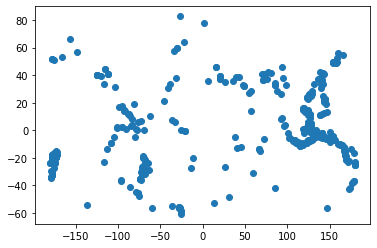

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8"])
plt.scatter(Current['longitude'],Current['lattitude'])

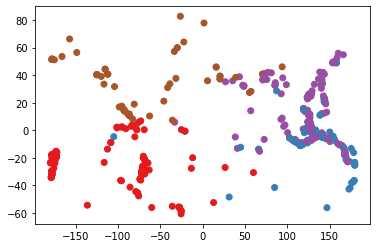

In [31]:
y_pred = KMeans(n_clusters=4,n_init=1, init='random', max_iter=1).fit_predict(sca)
Current['grouping']=y_pred
plt.scatter(Current['longitude'],Current['lattitude'],c=y_pred,cmap=cmap)

In [32]:
from sklearn.metrics import silhouette_score

for n in range(2,21):
    clusters = KMeans(n_clusters=n, random_state=1).fit_predict(sca)
    sil = silhouette_score(sca, clusters)
    print('n = %d. Score =%f '%(n,round(sil, 5)))


n = 2. Score =0.364560 
n = 3. Score =0.384680 
n = 4. Score =0.389220 
n = 5. Score =0.373280 
n = 6. Score =0.365220 
n = 7. Score =0.364420 
n = 8. Score =0.348860 
n = 9. Score =0.358820 
n = 10. Score =0.364790 
n = 11. Score =0.365800 
n = 12. Score =0.362080 
n = 13. Score =0.357680 
n = 14. Score =0.370390 
n = 15. Score =0.354460 
n = 16. Score =0.360760 
n = 17. Score =0.360620 
n = 18. Score =0.351870 
n = 19. Score =0.353330 
n = 20. Score =0.358180 


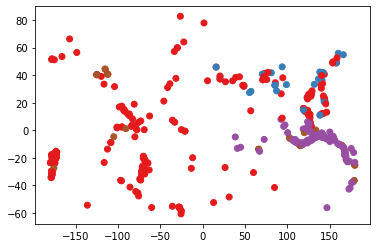

In [36]:
agg_cluster_model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=7)
y_pred1 = agg_cluster_model.fit_predict(sca)
Current['grouping1']=y_pred1
plt.scatter(Current['longitude'],Current['lattitude'],c=y_pred1,cmap=cmap)

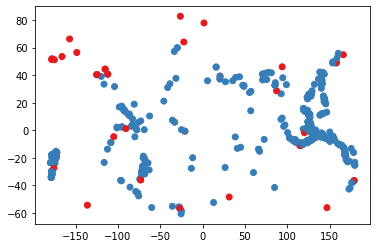

In [40]:
db_model = DBSCAN(eps=1, min_samples=30).fit(sca)
y_pred2 = db_model.fit_predict(sca)
Current['grouping2']=y_pred2
plt.scatter(Current['longitude'],Current['lattitude'],c=y_pred2,cmap=cmap)